William Untung - 2802446573

Library Used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

# pd.set_option('display.max_seq_items', None)

# pd.set_option('display.max_rows', None)

Load Data

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/18tkmmIqfrH0ZdIYc_wriCwumuFO1xhNNwobNapTA-U4/export?format=csv&gid=837018842#gid=837018842')

# By input the dataset into project folder
# df = pd.read_csv('./Credis_Score_Dataset_A.csv')

### 1.a.

#### Data Description

In [ ]:
df_clean = df
print(f'Dataset Size: {df_clean.shape}')
df_clean.head()

Dataset Size: (50000, 28)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x113fb,CUS_0x78af,February,Greg Roumeliotisg,36,365-11-8309,Teacher,88827.54,7199.295000,5,...,Standard,512.09,27.652902,11 Years and 3 Months,Yes,277.043609,135.0287762,!@9#%8,567.8571148,Standard
1,0x23e41,CUS_0x7d8,April,Ayla Jeany,14_,680-85-5010,Doctor,19288.47_,1408.372500,10,...,Bad,1873.07,28.477331,5 Years and 7 Months,Yes,49.388699,176.9208614,Low_spent_Small_value_payments,204.5276896,Poor
2,0x20142,CUS_0x39d4,January,Debra Shermanh,45,034-42-6069,Accountant,73507.4,6146.616667,8,...,Bad,1660.98,24.865827,15 Years and 7 Months,Yes,412.051367,186.5895567,High_spent_Medium_value_payments,266.0207429,Poor
3,0xd194,CUS_0x8ac8,July,Steve Schererz,22,751-26-7144,Teacher,10037.735,871.477917,8,...,Bad,3052.44,33.704571,8 Years and 1 Months,Yes,36.667662,16.69811396,High_spent_Medium_value_payments,283.7820159,Standard
4,0x64dc,CUS_0x6734,March,Lefterisi,19,276-02-5954,_______,30922.5,2477.875000,8,...,Bad,4742.53,30.643675,1 Years and 0 Months,Yes,165.891821,218.497776,Low_spent_Small_value_payments,153.3979033,Standard


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44957 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42486 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44268 non-null  object 
 14  Delay_

#### Check inconsistence Data

In [ ]:
# Check data type
for c in df.columns:
    print(f'{df[c].dtype} ; {df[c].value_counts()}\n')
# Drop: ID, Customer_ID, Name, SSN, Age
# Invalid:  Occupation, Annual_Income, Num_of_Loan, Type_of_Loan, Num_of_Delayed_Payment,
#           Changed_Credit_Limit, Credit_Mix, Outstanding_Debt, Credit_History_Age, Payment_of_Min_Amount,
#           Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score

object ; ID
0x300d     1
0x3fbf     1
0x16d41    1
0x154a4    1
0x2469b    1
          ..
0x64dc     1
0xd194     1
0x20142    1
0x23e41    1
0x113fb    1
Name: count, Length: 50000, dtype: int64

object ; Customer_ID
CUS_0x6573    8
CUS_0x8525    8
CUS_0x4669    8
CUS_0xb239    8
CUS_0x531b    8
             ..
CUS_0x59cd    1
CUS_0x96e5    1
CUS_0x8e44    1
CUS_0x7023    1
CUS_0x6c9b    1
Name: count, Length: 12454, dtype: int64

object ; Month
May         6304
April       6281
June        6261
July        6257
August      6256
March       6242
February    6237
January     6162
Name: count, dtype: int64

object ; Name
Stevex             26
Langep             25
Phila              23
Nicko              22
Lucia Mutikanip    22
                   ..
Jan Harveyf         1
Rodrigo Camposc     1
Lewisb              1
Emily Flittero      1
Dennyv              1
Name: count, Length: 10081, dtype: int64

object ; Age
34      1418
38      1407
28      1402
26      1399
35      1373
        ..

In [ ]:
inval_col = ['Occupation', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
             'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
             'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
             'Credit_Score']

for c in inval_col:
    print(f'{df[c].value_counts()}\n{df[c].dtypes}\n')

Occupation
_______          3581
Lawyer           3261
Architect        3233
Scientist        3217
Mechanic         3174
Engineer         3142
Accountant       3121
Teacher          3117
Media_Manager    3081
Entrepreneur     3064
Journalist       3059
Developer        3052
Doctor           3047
Manager          2996
Musician         2941
Writer           2914
Name: count, dtype: int64
object

Annual_Income
20867.67              10
9141.63                9
33832.58               8
67481.24               8
14773.38               8
                      ..
3818546                1
31272.27_              1
48776.85000000001_     1
19620.3_               1
76386.04_              1
Name: count, Length: 15956, dtype: int64
object

Num_of_Loan
2       7169
3       7117
4       6957
0       5223
1       4940
        ... 
1182       1
1319       1
1340       1
198        1
640        1
Name: count, Length: 258, dtype: int64
object

Num_of_Delayed_Payment
17      2613
19      2608
16      2601
1

#### Handle Inconsistence Data

In [ ]:
# drop irrellevant columns
df_clean = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'])

In [ ]:
df_clean['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,26587
Poor,14499
Good,8914


In [ ]:
mapping = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

df_clean['Credit_Score'] = df_clean['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2}).astype('int64')

##### Numerical Cols

In [ ]:
# Inconsistent Data
df_clean['Age'] = df['Age'].str.extract('(\d+)').astype(int)
# df_clean['Age'].value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3132324965.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_clean['Age'] = df['Age'].str.extract('(\d+)').astype(int)


In [ ]:
# df["Annual_Income"].value_counts()
df_clean["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
# df_clean["Annual_Income"].value_counts()

In [ ]:
# print(f'Data Type: {df['Num_of_Loan'].dtype}\n{df_clean["Num_of_Loan"].value_counts()}')
df_clean["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")

In [ ]:
df_clean["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")

In [ ]:
df_clean["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"], errors="coerce")

In [ ]:
df_clean["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")

In [ ]:
df_clean["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
# df_clean['Monthly_Balance'].value_counts()

In [ ]:
# df_clean['Type_of_Loan'].value_counts()
df_clean['Type_of_Loan'] = df_clean['Type_of_Loan'].str.replace('and ', '', regex=False)
loan_dummies = df_clean['Type_of_Loan'].str.get_dummies(sep=', ')
df_clean = pd.concat([df_clean, loan_dummies], axis=1)

In [ ]:
# print(f'Data Type: {df['Num_of_Delayed_Payment'].dtype}\n{df_clean["Num_of_Delayed_Payment"].value_counts()}')
df_clean["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce").round(0)
# masih float karena ada na
print(df_clean['Num_of_Delayed_Payment'].isna().sum())

4778


In [ ]:
# df_clean['Credit_History_Age'].unique()
df_clean[["years", "months"]] = (
    df_clean["Credit_History_Age"]
    .str.extract(r"(\d+)\s+Years?\s+and\s+(\d+)\s+Months?")
    .astype(float)
)
# new columns
df_clean.drop(columns = ['Credit_History_Age'], inplace = True)

##### Categorical Cols

In [ ]:
# df['Occupation'].value_counts()
df_clean["Occupation"] = df["Occupation"].replace(["_______"], np.nan)
# df_clean['Occupation'].value_counts()

In [ ]:
# df['Credit_Mix'].value_counts()
df_clean["Credit_Mix"] = df["Credit_Mix"].replace(["_"], np.nan)
# df_clean['Credit_Mix'].value_counts()

In [ ]:
# df['Payment_of_Min_Amount'].value_counts()
df_clean["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace(["NM"], np.nan)
# df_clean['Payment_of_Min_Amount'].value_counts()

In [ ]:
# df['Payment_Behaviour'].value_counts()
df_clean["Payment_Behaviour"] = df["Payment_Behaviour"].replace(["!@9#%8"], np.nan)
# df_clean['Payment_Behaviour'].value_counts()

#### Handle Outliers

In [ ]:
# Check outlier in Numerical column (for features)
df_clean.drop(columns=['Credit_Score']).describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,years,months
count,50000.000000,4.653800e+04,42486.000000,50000.000000,50000.000000,50000.000000,47632.000000,50000.000000,45222.000000,48937.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,45434.000000,45434.000000
mean,119.241440,1.793874e+05,4185.119759,17.096480,21.991720,70.697020,3.077133,21.095320,31.592964,10.421178,...,0.317320,0.312280,0.313920,0.314120,0.318260,0.319820,0.311520,0.310840,17.912048,5.586147
std,682.889508,1.450792e+06,3184.381268,116.516927,127.545788,459.507521,65.622510,14.844689,233.587162,6.798318,...,0.465438,0.463428,0.464089,0.464169,0.465806,0.466411,0.463119,0.462842,8.293985,3.458771
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.937576e+04,1622.668333,4.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.320000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.250000,3.000000
50%,34.000000,3.722724e+04,3080.555000,6.000000,6.000000,14.000000,3.000000,18.000000,14.000000,9.440000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000
75%,42.000000,7.267476e+04,5938.440000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000
max,8698.000000,2.417715e+07,15204.633330,1798.000000,1498.000000,5788.000000,1484.000000,67.000000,4397.000000,36.290000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,11.000000


In [ ]:
temp = ["Num_Bank_Accounts", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit"]
s = df_clean[temp].apply(pd.to_numeric, errors="coerce") # pakai apply karena pd.to_numeric hanya menerima data series / 1D
s[s < 0] = pd.NA # merubah yang minus jadi na, biar gak ada penilaian subjektif
df_clean[temp] = s

In [ ]:
num_cols = df_clean.drop(columns = ['Credit_Score']).select_dtypes(include = np.number).columns.to_list()

for c in num_cols:
    count = 0
    q1 = df_clean[c].quantile(0.25)
    q3 = df_clean[c].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - IQR * 1.5
    upper = q3 + IQR * 1.5

    count = ((df_clean[c] > upper) | (df_clean[c] < lower)).sum()

    print(f'Outlier {c} : {count}\n')

    df_clean[c] = df_clean[c].clip(lower, upper) # mengganti value outlier dengan lower / upper menggunakan .clip(lower, upper)

df_clean.drop('Credit_Score', axis = 1).describe()

Outlier Age : 1401

Outlier Annual_Income : 1289

Outlier Monthly_Inhand_Salary : 859

Outlier Num_Bank_Accounts : 677

Outlier Num_Credit_Card : 1092

Outlier Interest_Rate : 987

Outlier Num_of_Loan : 243

Outlier Delay_from_due_date : 1995

Outlier Num_of_Delayed_Payment : 358

Outlier Changed_Credit_Limit : 317

Outlier Num_Credit_Inquiries : 829

Outlier Outstanding_Debt : 2622

Outlier Credit_Utilization_Ratio : 2

Outlier Total_EMI_per_month : 3369

Outlier Amount_invested_monthly : 3811

Outlier Monthly_Balance : 3788

Outlier Auto Loan : 0

Outlier Credit-Builder Loan : 0

Outlier Debt Consolidation Loan : 0

Outlier Home Equity Loan : 0

Outlier Mortgage Loan : 0

Outlier Not Specified : 0

Outlier Payday Loan : 0

Outlier Personal Loan : 0

Outlier Student Loan : 0

Outlier years : 0

Outlier months : 0



,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,years,months
count,50000.000000,46538.000000,42486.000000,49988.000000,50000.000000,50000.000000,45653.000000,49698.000000,44906.000000,48182.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,45434.000000,45434.000000
mean,34.265070,51117.931040,4157.034806,5.464461,5.671320,15.014280,3.580520,21.065214,13.603216,10.611269,...,0.317320,0.312280,0.313920,0.314120,0.318260,0.319820,0.311520,0.310840,17.912048,5.586147
std,12.031454,38672.112499,3102.692005,2.670466,2.228347,9.226578,2.491203,14.344664,6.398141,6.628089,...,0.465438,0.463428,0.464089,0.464169,0.465806,0.466411,0.463119,0.462842,8.293985,3.458771
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,19375.760000,1622.668333,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.560000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.250000,3.000000
50%,34.000000,37227.240000,3080.555000,6.000000,6.000000,14.000000,3.000000,18.000000,14.000000,9.560000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000
75%,42.000000,72674.760000,5938.440000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.020000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000
max,67.500000,152623.260000,12412.097500,11.500000,11.500000,38.000000,9.500000,55.000000,31.500000,29.210000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,11.000000


In [ ]:
df_clean['Age'] = round(df_clean['Age'], 0)

In [ ]:
df_clean['Age'].describe()

,Age
count,50000.000000
mean,34.279080
std,12.070375
min,14.000000
25%,25.000000
50%,34.000000
75%,42.000000
max,68.000000


In [ ]:
df_clean['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,26265
No,17700


In [ ]:
print(f'null in Payment_of_Min_Amount: {df_clean['Payment_of_Min_Amount'].isna().sum()}')
# karena lumayan sedikit untuk di drop tapi lumayan banyak yang mungkin
# bikin model kearah most_frequent maka akan di filter dari row = 50000 menjadi 43965
df_clean = df_clean[df_clean['Payment_of_Min_Amount'].notna()]

null in Payment_of_Min_Amount: 6035


#### After Data Cleaning

In [ ]:
# df_clean shape
df_clean.shape

(43965, 34)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43965 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     43965 non-null  object 
 1   Age                       43965 non-null  float64
 2   Occupation                40840 non-null  object 
 3   Annual_Income             40914 non-null  float64
 4   Monthly_Inhand_Salary     37343 non-null  float64
 5   Num_Bank_Accounts         43953 non-null  float64
 6   Num_Credit_Card           43965 non-null  float64
 7   Interest_Rate             43965 non-null  int64  
 8   Num_of_Loan               40165 non-null  float64
 9   Type_of_Loan              38883 non-null  object 
 10  Delay_from_due_date       43695 non-null  float64
 11  Num_of_Delayed_Payment    39529 non-null  float64
 12  Changed_Credit_Limit      42371 non-null  float64
 13  Num_Credit_Inquiries      43106 non-null  float64
 14  Credit_Mix 

In [ ]:
df_clean.isna().sum()
# na ditangani dengan imputer setelah spliting agar tidak terjadi data leakage

,0
Month,0
Age,0
Occupation,3125
Annual_Income,3051
Monthly_Inhand_Salary,6622
Num_Bank_Accounts,12
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,3800
Type_of_Loan,5082


In [ ]:
print(f'Duplicated values: {df.duplicated().sum()}')

Duplicated values: 0


#### Insight

/tmp/ipython-input-1174211659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=df, palette='viridis')


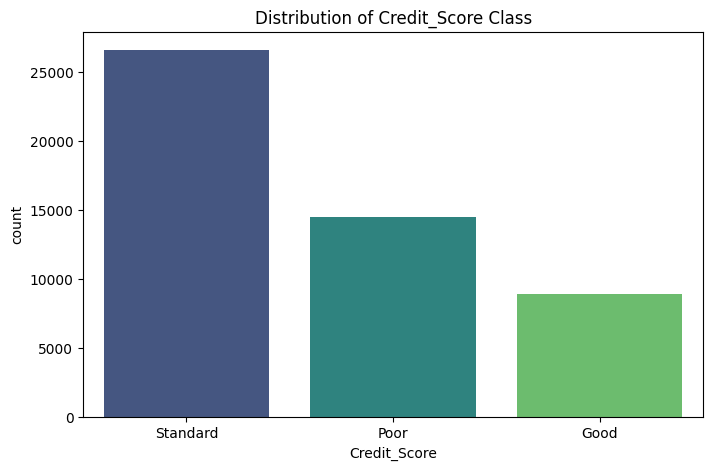

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_Score', data=df, palette='viridis')
plt.title('Distribution of Credit_Score Class')
plt.show()

From the distribution check of Credit_Score, it is known that the dataset is imbalanced, with a tendency toward Standard.<br>

In [ ]:
df_clean['Credit_Score'].value_counts()

,count
Credit_Score,
1,23458
0,12727
2,7780


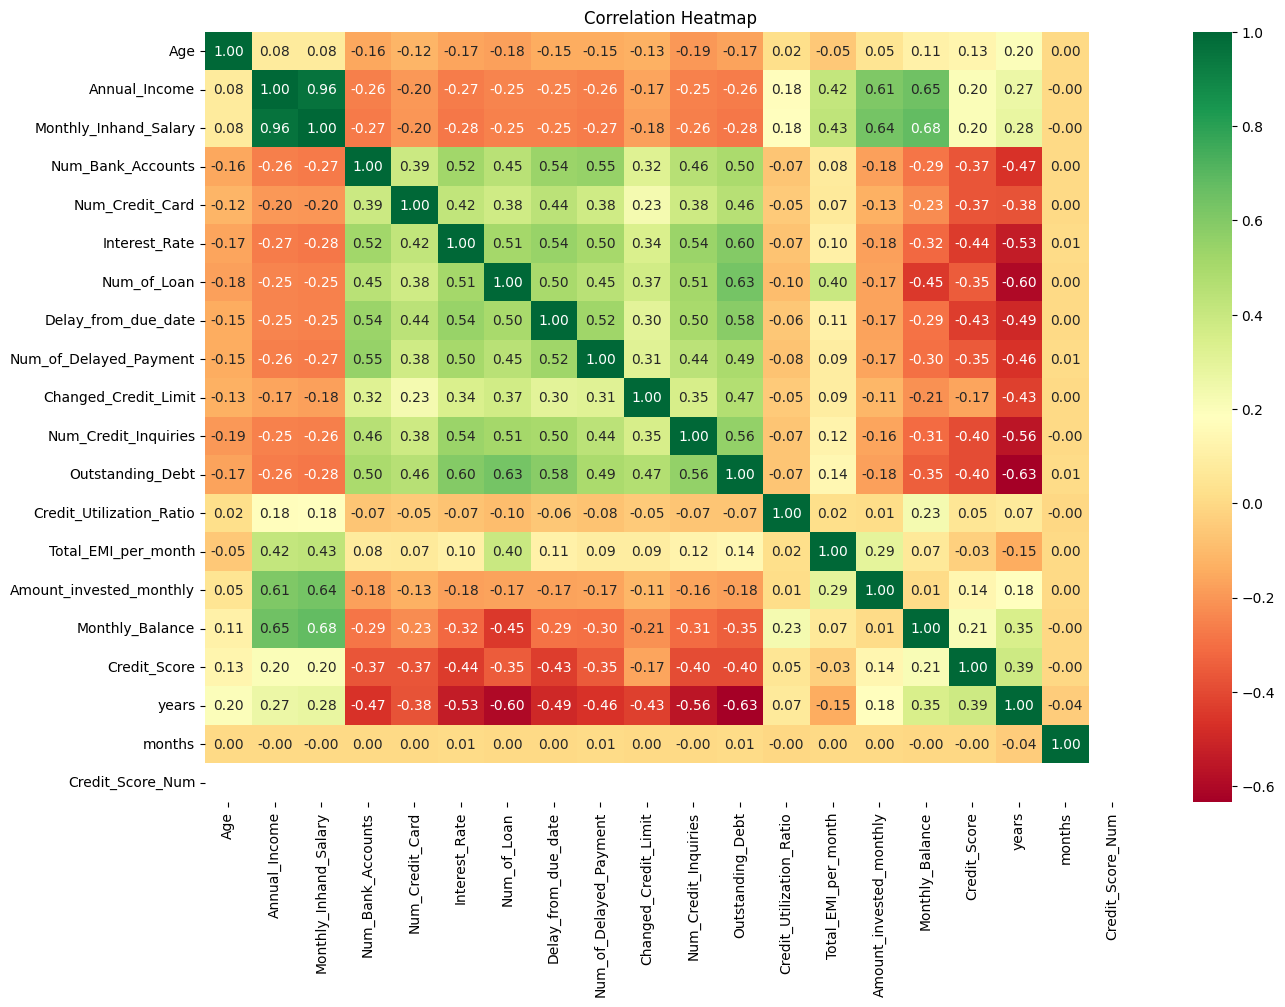

In [ ]:
df_numeric = df_clean.copy()
df_numeric['Credit_Score_Num'] = df_numeric['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

corr_matrix = df_numeric.drop(columns = ['Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']).select_dtypes(include=np.number).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

There is a strong correlation between Annual_Income and Monthly_Inhand_Salary of 0.96, indicating that both measure almost the same thing, which can lead to multicollinearity.<br>
Random Forest and XGBoost are quite robust in handling this issue <br>

It can be observed that the correlation of years is stronger than months across all features, so years will be used while months will be dropped.<br>

It is also noticeable in the middle section that all credit-related features are correlated,<br>
indicating that the customer’s risk profile is captured (Num_of_Loan and Outstanding_Debt have a correlation of 0.63).<br>
These features will become strong predictors for the model, especially for XGBoost.<br>

### 1.b.

#### features_cols

In [ ]:
bin_cols = ['Payment_of_Min_Amount']
cat_cols = df_clean.drop(columns=['Credit_Score', 'Payment_of_Min_Amount']).select_dtypes(include = 'object').columns.to_list()
num_cols = df_clean.drop(columns=['Credit_Score', 'Payment_of_Min_Amount']).select_dtypes(include = np.number).columns.to_list()

#### Data Splitting

In [ ]:
x = df_clean.drop('Credit_Score', axis = 1)
y = df_clean['Credit_Score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=12)

#### Base Model

In [ ]:
# Pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

bin_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols),
        ('bin', bin_pipe, bin_cols)
    ]
)

rf = RandomForestClassifier(
    n_estimators= 400,
    random_state= 12,
    min_samples_leaf = 4,
    class_weight='balanced',
    max_depth = 4
)

xgb = XGBClassifier(
    objective = 'multi::softprob',
    num_class = 3,
    eval_metric = "mlogloss",
    random_state = 12,
    gamma = 0,
    learning_rate = 0.3,
    max_depth = 4
)

rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', rf)
])

xgb_model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', xgb)
])

In [ ]:
rf_model.fit(xTrain, yTrain)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Occupation',
                                                   'Type_of_Loan', 'Credit_Mix',
                                                   'Payment_Behaviour']),
                                                 ('bin',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Payment_of_Min_Amount'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        min_samples_leaf=4, n_estimators=400,
                                        random_state=12))])

In [ ]:
rf_pred = rf_model.predict(xTest)

In [ ]:
xgb_model.fit(xTrain, yTrain)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_...
                               feature_types=None, feature_weights=None,
                               gamma=0, grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=3, ...))])

In [ ]:
xgb_pred = xgb_model.predict(xTest)

#### GridSearchCV

In [ ]:
rf_param_grid = {
    'clf__n_estimators': [100, 300, 400],
    'clf__min_samples_leaf': [1, 4, 8],
    'clf__max_depth': [3, 4, 10]
}

xgb_param_grid = {
    'clf__max_depth': [4, 5, 7],
    'clf__learning_rate': [0.01, 0.03, 0.1],
    'clf__gamma': [0, 0.5, 1.0]
}

rf_grid = GridSearchCV(
    rf_model,
    rf_param_grid,
    scoring = 'f1_macro',
    cv = 3,
    n_jobs = -1 #number of cpu core used for training
)

xgb_grid = GridSearchCV(
    xgb_model,
    xgb_param_grid,
    scoring = 'f1_macro',
    cv = 3,
    n_jobs = -1
)

In [ ]:
rf_grid.fit(xTrain, yTrain)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Annual_Income',
                                                                          'Monthly_Inhand_Salary',
                                                                          'Num_Bank_Accounts',
                                                                          'Num_Credit_Card',
                                                                          'Interest_Rate',
                                                                          'Num_of_Loan',
                                                                          'Delay_from_due_date',
                                                                          'Num_of_Delayed_Payment',...
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Payment_of_Min_Amount'])])),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=4,
                                                               min_samples_leaf=4,
                                                               n_estimators=400,
                                                               random_state=12))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [3, 4, 10],
                         'clf__min_samples_leaf': [1, 4, 8],
                         'clf__n_estimators': [100, 300, 400]},
             scoring='f1_macro')

In [ ]:
rf_grid_pred = rf_grid.predict(xTest)

In [ ]:
print(f'Best param: {rf_grid.best_params_}')

Best param: {'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 300}


In [56]:
xgb_grid.fit(xTrain, yTrain)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Annual_Income',
                                                                          'Monthly_Inhand_Salary',
                                                                          'Num_Bank_Accounts',
                                                                          'Num_Credit_Card',
                                                                          'Interest_Rate',
                                                                          'Num_of_Loan',
                                                                          'Delay_from_due_date',
                                                                          'Num_of_Delayed_Payment',...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=4,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=3, ...))]),
             n_jobs=-1,
             param_grid={'clf__gamma': [0, 0.5, 1.0],
                         'clf__learning_rate': [0.01, 0.03, 0.1],
                         'clf__max_depth': [4, 5, 7]},
             scoring='f1_macro')

In [57]:
xgb_grid_pred = xgb_grid.predict(xTest)

In [58]:
print(f'Best param: {xgb_grid.best_params_}')

Best param: {'clf__gamma': 1.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 7}


### 1.c

In [59]:
# Accuracy
print(f'Accuracy model Random Forest = {accuracy_score(yTest, rf_pred)*100}%')
print(f'Accuracy model XGBoost = {accuracy_score(yTest, xgb_pred)*100}%')
print(f'Accuracy GridSearch Random Forest = {accuracy_score(yTest, rf_grid_pred)*100}%')
print(f'Accuracy GridSearch XGBoost = {accuracy_score(yTest, xgb_grid_pred)*100}%')

Accuracy model Random Forest = 53.65631752530422%
Accuracy model XGBoost = 70.9655407710679%
Accuracy GridSearch Random Forest = 61.947003298078016%
Accuracy GridSearch XGBoost = 71.76162856817923%


In [60]:
print(f'Macro_F1_Score model Random Forest = {f1_score(yTest, rf_pred, average = 'macro')}')
print(f'Macro_F1_Score model XGBoost = {f1_score(yTest, xgb_pred, average = 'macro')}')
print(f'Macro_F1_Score GridSearch Random Forest = {f1_score(yTest, rf_grid_pred, average = 'macro')}')
print(f'Macro_F1_Score GridSearch XGBoost = {f1_score(yTest, xgb_grid_pred, average = 'macro')}')

Macro_F1_Score model Random Forest = 0.5386496628709848
Macro_F1_Score model XGBoost = 0.6830577280779915
Macro_F1_Score GridSearch Random Forest = 0.6185165304521701
Macro_F1_Score GridSearch XGBoost = 0.6923856042136168


In [61]:
print(f'Weighted_F1_Score model Random Forest = {f1_score(yTest, rf_pred, average = 'weighted')}')
print(f'Weighted_F1_Score model XGBoost = {f1_score(yTest, xgb_pred, average = 'weighted')}')
print(f'Weighted_F1_Score GridSearch Random Forest = {f1_score(yTest, rf_grid_pred, average = 'weighted')}')
print(f'Weighted_F1_Score GridSearch XGBoost = {f1_score(yTest, xgb_grid_pred, average = 'weighted')}')

Weighted_F1_Score model Random Forest = 0.5163274701819632
Weighted_F1_Score model XGBoost = 0.7086406752592403
Weighted_F1_Score GridSearch Random Forest = 0.6194610381835102
Weighted_F1_Score GridSearch XGBoost = 0.7170025237160073


In [62]:
print(f'Confusion matrix Random Forest:\n{confusion_matrix(yTest, rf_pred)}\n')
print(f'Confusion matrix XGBoost:\n{confusion_matrix(yTest, xgb_pred)}\n')
print(f'Confusion matrix GridSearchCV Random Forest:\n{confusion_matrix(yTest, rf_grid_pred)}\n')
print(f'Confusion matrix GridSearchCV XGBoost:\n{confusion_matrix(yTest, xgb_grid_pred)}\n')

Confusion matrix Random Forest:
[[1891  122  460]
 [1480 1433 1810]
 [  84  119 1394]]

Confusion matrix XGBoost:
[[1608  734  131]
 [ 565 3662  496]
 [  27  600  970]]

Confusion matrix GridSearchCV Random Forest:
[[1874  181  418]
 [1202 2219 1302]
 [  56  187 1354]]

Confusion matrix GridSearchCV XGBoost:
[[1652  689  132]
 [ 560 3668  495]
 [  20  587  990]]



### 1.d

In [63]:
importances = xgb_model.named_steps['clf'].feature_importances_

importances = xgb_model[-1].feature_importances_
feature_names = xgb_model.named_steps['preprocess'].get_feature_names_out()

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print('10 top features')
print(feat_importances.head(10))

10 top features
                             Feature  Importance
6167  bin__Payment_of_Min_Amount_Yes    0.097990
6160        cat__Credit_Mix_Standard    0.077550
6159            cat__Credit_Mix_Good    0.073667
11             num__Outstanding_Debt    0.052314
6158             cat__Credit_Mix_Bad    0.024922
5                 num__Interest_Rate    0.018363
4               num__Num_Credit_Card    0.015426
3             num__Num_Bank_Accounts    0.011048
9          num__Changed_Credit_Limit    0.009971
7           num__Delay_from_due_date    0.008824
